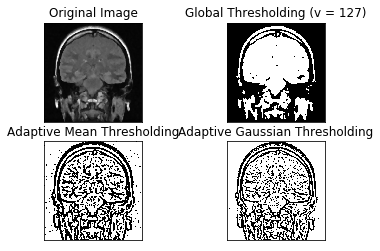

In [45]:
import cv2
import numpy as np
from skimage import io
from skimage import measure
import matplotlib.pyplot as plt
  
#read image
image = cv2.imread('H:/FYP/interim/aniso.jpg',0)

#preprocess using median blur
img = cv2.medianBlur(image,5)

ret,th1 = cv2.threshold(img,70,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

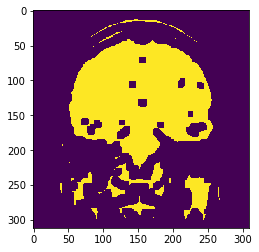

In [62]:
#erosion using morphological operations

kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(th1, kernel, iterations = 3)
plt.imshow(erosion)

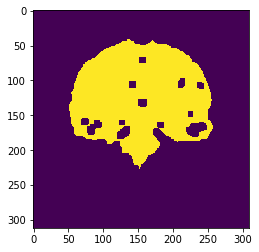

In [63]:
# perform a connected component analysis on the eroded image, then initialize a mask to store only the "large" components

labels = measure.label(erosion, neighbors=8, background=0)
mask1 = np.zeros(erosion.shape, dtype="uint8")
 
# loop over the unique components
for label in np.unique(labels):
	# if this is the background label, ignore it
	if label == 0:
		continue
 
	# otherwise, construct the label mask and count the
	# number of pixels 
	labelMask = np.zeros(erosion.shape, dtype="uint8")
	labelMask[labels == label] = 255
	numPixels = cv2.countNonZero(labelMask)
 
	# if the number of pixels in the component is sufficiently
	# large, then add it to our mask of "large blobs"
	if numPixels > 1800:
		mask1 = cv2.add(mask1, labelMask)
        
plt.imshow(mask1)

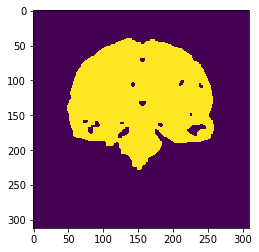

In [64]:
mask = cv2.dilate(mask1,kernel,iterations = 2)
plt.imshow(mask)

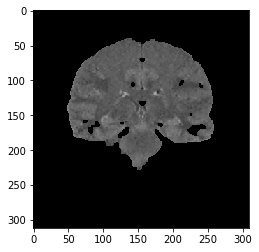

In [65]:
#extract the brain using the mask
img = io.imread("H:/FYP/interim/aniso.jpg")
mask2 = np.where((mask<200),0,1).astype('uint8')

brain_img = img*mask2[:,:,np.newaxis]

plt.imshow(brain_img)